In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
!gdown 1Xtw10ZVSDD8BiIjSd6gjNFiWwx9QJvDE

Downloading...
From: https://drive.google.com/uc?id=1Xtw10ZVSDD8BiIjSd6gjNFiWwx9QJvDE
To: /content/Copy of compiled_risk_data.xlsx
100% 310k/310k [00:00<00:00, 3.57MB/s]


In [5]:
print("Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy dataset.")

Setup complete. Imported pandas, seaborn, and matplotlib. Downloaded Webacy dataset.


In [10]:
data = pd.read_excel('/content/Copy of compiled_risk_data.xlsx')
data.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [11]:
data.columns

Index(['project_name', 'Smart contract address', 'Blog post link',
       'Audit website', 'Chain', 'Is_closed_source', 'hidden_owner',
       'anti_whale_modifiable', 'Is_anti_whale', 'Is_honeypot', 'buy_tax',
       'sell_tax', 'slippage_modifiable', 'Is_blacklisted',
       'can_take_back_ownership', 'owner_change_balance', 'is_airdrop_scam',
       'selfdestruct', 'trust_list', 'is_whitelisted', 'is_fake_token',
       'illegal_unicode', 'exploitation', 'bad_contract',
       'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths',
       'Summary/rationale of risk tags marked true'],
      dtype='object')

In [12]:
data_new = data.copy()
# Assuming the dataset has multiple features, we select a few relevant ones
feature_1 = 'hidden_owner'
feature_2 = 'Is_honeypot'
feature_3 = 'exploitation'
selected_features = data_new[[feature_1, feature_2,feature_3]].replace({True:1, False:0})
print("Features selected for clustering:")

print(selected_features.head())

Features selected for clustering:
   hidden_owner  Is_honeypot  exploitation
0             0            0             1
1             0            0             0
2             0            0             1
3             0            1             1
4             0            1             1


In [13]:
from scipy.spatial.distance import pdist, squareform

# Assuming 'selected_features' is your DataFrame with binary data
distance_matrix = pdist(selected_features, 'jaccard')
distance_square_matrix = squareform(distance_matrix)  # Convert to square matrix

In [14]:
import scipy.cluster.hierarchy as sch

# Create linkage matrix
linkage_matrix = sch.linkage(distance_matrix, method='ward')

In [15]:
linkage_matrix

array([[0.00000000e+00, 2.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 5.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [9.00000000e+00, 1.09300000e+03, 0.00000000e+00, 3.00000000e+00],
       ...,
       [2.17900000e+03, 2.18100000e+03, 6.06629803e+00, 2.09000000e+02],
       [2.02900000e+03, 2.18200000e+03, 1.06143505e+01, 5.58000000e+02],
       [2.17700000e+03, 2.18300000e+03, 2.13354187e+01, 1.09300000e+03]])

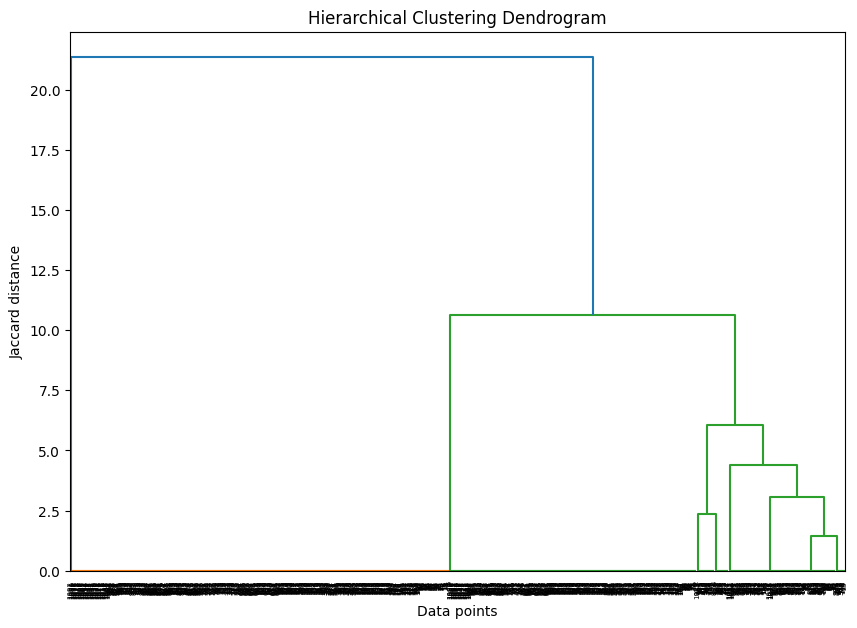

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Jaccard distance')
plt.show()

In [17]:
cluster_labels = fcluster(linkage_matrix, t=5, criterion='distance')

# Add cluster labels back to your original DataFrame
data_new['cluster'] = cluster_labels

# Summary statistics for each cluster
cluster_summary = data_new[[feature_1, feature_2, feature_3,'cluster']].groupby('cluster').agg(['mean', 'std', 'median', 'count'])
cluster_summary


hidden_owner                   Is_honeypot                         \
                mean  std median count        mean       std median count   
cluster                                                                     
1                0.0  0.0    0.0   535     0.00000  0.000000    0.0   535   
2                0.0  0.0    0.0   349     0.00000  0.000000    0.0   349   
3                0.0  0.0    0.0    45     1.00000  0.000000    1.0    45   
4                1.0  0.0    1.0   164     0.29878  0.459125    0.0   164   

        exploitation                         
                mean       std median count  
cluster                                      
1           0.000000  0.000000    0.0   535  
2           1.000000  0.000000    1.0   349  
3           0.555556  0.502519    1.0    45  
4           0.573171  0.496132    1.0   164

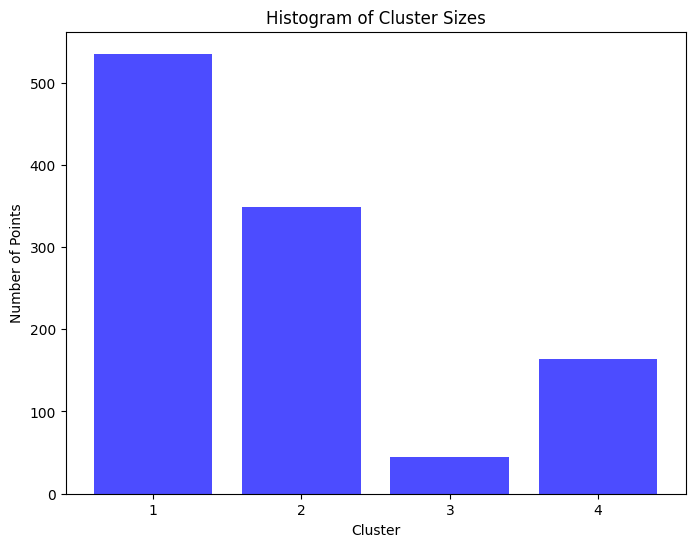

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(cluster_labels, bins=np.arange(1, np.max(cluster_labels)+2)-0.5, rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram of Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.xticks(np.arange(1, np.max(cluster_labels)+1))
plt.show()

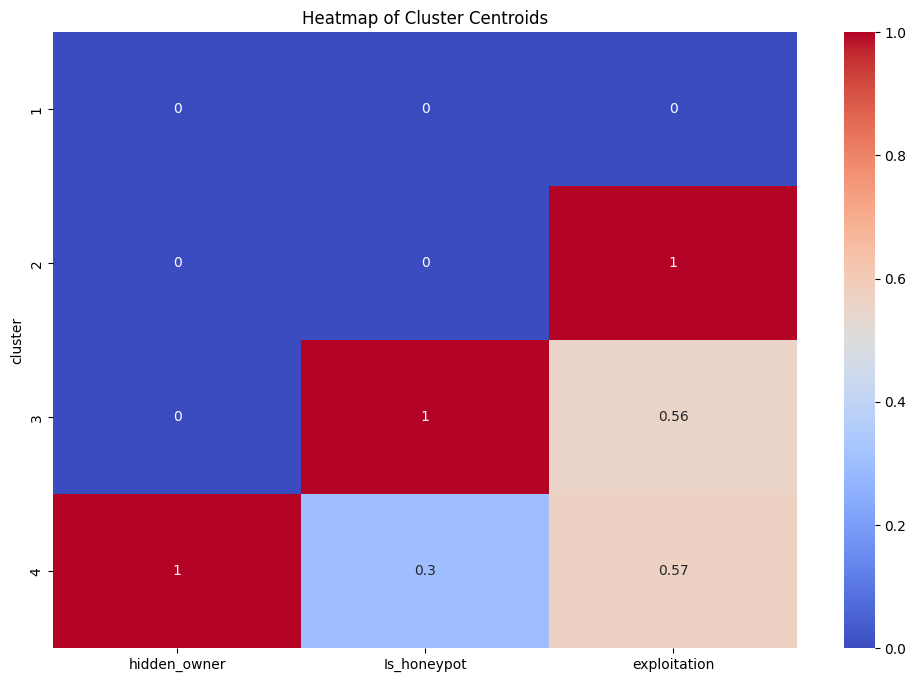

In [19]:
cluster_centers = data_new[[feature_1, feature_2, feature_3,'cluster']].groupby('cluster').mean()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Centroids')
plt.show()